**Illusteration of Newton's method**

Newton's method is an functional iteration algorithm for finding roots of functions. If $f \in C^{2}[a,b]$, with $f(p) = 0$ and $f^{\prime}(p) \neq 0$, then the functionional iterations $p_{n+1} = g(p_n)$, for 

$$
g(x) = x - \dfrac{f(x)}{f^{\prime}(x)}
$$

converge to the root $p$ for $p_0 \in [p -\delta, p + \delta]$, where $\delta$ is sufficiently small.

In [1]:
## Testing Newton's method
import numpy as np
import pandas as pd

def fixed_point(p0, e, max_it, g):
    p = []
    p.append(p0)
    i = 1
    while i <= max_it:
        try:
            p.append(g(p0))
        except:
            print('Arithmetic error')
            return(p)
        if abs(p[i] - p0) <= e:
            return(p)
        p0 = p[i]
        i += 1
    
    print('max number of iteration exceeded')
    return(p)

def g1(x):
    y = np.cos(x)
    return y

def g2(x):
    y = x + (np.cos(x) - x)/(np.sin(x) + 1)
    return y

p0 = np.pi / 4

max_it = 10
e = 1e-8


p_f = fixed_point(p0, e, max_it, g1)
p_n = fixed_point(p0, e, max_it, g2)

all_ps = {'p1':p_f, 'p2':p_n}
D = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in all_ps.items()]))
pd.options.display.float_format = '{:,.15f}'.format
print(D)

max number of iteration exceeded
                  p1                p2
0  0.785398163397448 0.785398163397448
1  0.707106781186548 0.739536133515238
2  0.760244597075630 0.739085178106010
3  0.724667480889126 0.739085133215161
4  0.748719885789484 0.739085133215161
5  0.732560844592242               NaN
6  0.743464211315294               NaN
7  0.736128256500852               NaN
8  0.741073687083710               NaN
9  0.737744158992575               NaN
10 0.739987764795871               NaN


(-3.0, 3.0)

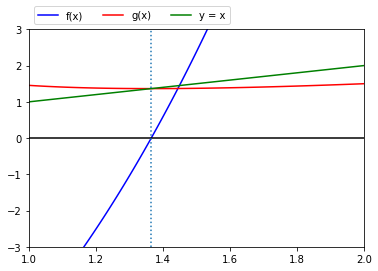

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def f(x):
    y = x ** 3 + 4 * x ** 2 - 10
    return(y)

def fp(x):
    y = 3 * x ** 2 + 8 * x
    return(y)

def g(x):
    y = x - f(x) / fp(x)
    return(y)


def newtons_method(p0, e, max_it):
    i = 1
    while i <= max_it:
        p = g(p0)
        if abs(p - p0) <= e:
            return(p)
        p0 = p
        i += 1
    return(-999)

p0 = 1.5
e = 0.0000000001
max_it = 1000
p = newtons_method(p0, e, max_it)

a = 1
b = 2

x   = np.linspace(a, b, 100)
fx  = f(x)
fpx = fp(x)
gx  = g(x)

fig, ax = plt.subplots()

ax.plot(x, fx, color = 'blue', label = 'f(x)')
ax.plot(x, gx, color = 'red', label = 'g(x)')
ax.plot(x, np.zeros_like(x), color = 'black')
ax.plot(x, x, color = 'green', label = 'y = x')
ax.axvline(x=p, linestyle=':')
ax.legend(ncol = 3, loc = 3, bbox_to_anchor = (0,1))

ax.set_xlim(1,2)
ax.set_ylim(-3,3)

## Secant method
One of the drawbacks of the Newton's method is the requirement for calculating $f'(x)$. The Secant method approximates $f'(x)$ as follows.

$$
f'(p_{n-1}) = \lim_{x \rightarrow p_{n-1}}\dfrac{f(p_{n-1}) - f(x)}{p_{n-1} - x}
$$

Since $p_{n-2}$ is close to $p_{n-1}$, we will use the following approximation:

$$
f'(p_{n-1}) \approx \dfrac{f(p_{n-1}) - f(p_{n-2})}{p_{n-1} - p_{n-2}}
$$

Substituting this approximation in the Newton's fixed-point iteration, we get

$$
p_{n} = p_{n-1} - \dfrac{f(p_{n-1})(p_{n-1} - p_{n-2})}{f(p_{n-1}) - f(p_{n-2})}
$$

Note that for the secant method, we need two initial guesses.

In [33]:
## Testing Newton's method
import numpy as np
import pandas as pd

def fixed_point(p0, e, max_it, g):
    p = []
    p.append(p0)
    i = 1
    while i <= max_it:
        try:
            p.append(g(p0))
        except:
            print('Arithmetic error')
            return(p)
        if abs(p[i] - p0) <= e:
            return(p)
        p0 = p[i]
        i += 1
    
    print('max number of iteration exceeded')
    return(p)

def secant_method(p0, p1, e, max_it, f):
    p = []
    p.extend([p0,p1]) ## note that to append another list we use extend
    i = 2
    while i <= max_it:
        try:
            p2 = p1 - (f(p1) * (p1 - p0))/(f(p1) - f(p0))
            p.append(p2)
        except:
            print('Arithmetic error')
            return(p)
        if abs(p2 - p1) <= e:
            return(p)
        p1 = p[i]
        p0 = p[i-1]
        i += 1
        
    
    print('max number of iteration exceeded')
    return(p)

def f(x):
    y = np.cos(x) - x
    return y

def g1(x):
    y = np.cos(x)
    return y

def g2(x):
    y = x + (np.cos(x) - x)/(np.sin(x) + 1)
    return y

p0 = 0.5
p1 = np.pi / 4

max_it = 10
e = 1e-8


p_s = secant_method(p0, p1, e, max_it, f)
p_n = fixed_point(p0, e, max_it, g2)

all_ps = {'p1':p_s, 'p2':p_n}
D = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in all_ps.items()]))
pd.options.display.float_format = '{:,.15f}'.format
print(D)

                 p1                p2
0 0.500000000000000 0.500000000000000
1 0.785398163397448 0.755222417105636
2 0.736384138836582 0.739141666149879
3 0.739058139213890 0.739085133920807
4 0.739085149337276 0.739085133215161
5 0.739085133215065               nan
6 0.739085133215161               nan
